<a href="https://colab.research.google.com/github/guilhermelaviola/NeuralNetworksAndDeepLearning/blob/main/Class12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applications of Deep Dream**
Deep Dreams are a creative application of deep learning that use neural networks to amplify patterns in images, producing surreal and dreamlike visuals while preserving recognizable elements of the original image. Widely used in digital art, design, education, and scientific exploration, this technique highlights the ability of neural networks to interpret visual features in unique ways. Beyond artistic expression, Deep Dreams support experimentation with neural network architectures and personalization, aided by open collaboration within the machine learning community. Their implementation relies on strong foundations in machine learning, programming (especially Python), and tools such as TensorFlow, Keras, and cloud platforms like Google Colab, making them a powerful and versatile innovation in artificial intelligence.

## **Example with Python: Deep Dream–Style Process**
Below is a simplified conceptual example showing how a Deep Dream–like process can be implemented using a pre-trained neural network in Python.

In [3]:
# Importing all the necessary libraries and resources:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

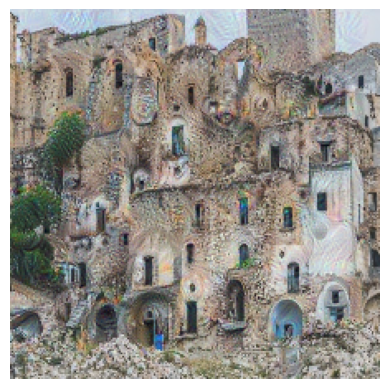

In [5]:
# Loading a pre-trained model (in this case, InceptionV3):
base_model = tf.keras.applications.InceptionV3(
    include_top=False, weights="imagenet"
)

# Choosing a layer to amplify:
layer_name = 'mixed3'
dream_model = tf.keras.Model(
    inputs=base_model.input,
    outputs=base_model.get_layer(layer_name).output
)

def deep_dream_step(image, step_size=0.01):
    with tf.GradientTape() as tape:
        tape.watch(image)
        activations = dream_model(image)
        loss = tf.reduce_mean(activations)

    gradients = tape.gradient(loss, image)
    gradients /= tf.math.reduce_std(gradients) + 1e-8
    image = image + step_size * gradients
    return image

# Loading and preprocessing an image:
img = tf.keras.preprocessing.image.load_img('craco-italy-02.jpg', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img, axis=0)
img = tf.keras.applications.inception_v3.preprocess_input(img)

# Applying multiple Deep Dream steps:
for _ in range(20):
    img = deep_dream_step(img)

# Displaying the result
result = img[0].numpy()
result = (result - result.min()) / (result.max() - result.min())

plt.imshow(result)
plt.axis('off')
plt.show()